# Unsupervised Learning: OnSports

## Problem Statement

### Context

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


### Objective

OnSports is a fantasy sports platform which has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data of the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

### Data Dictionary

- Player_Name: Name of the player
- Club: Club in which the player plays
- Position: Position in which the player plays
- Goals_Scored: Number of goals scored by the player in the previous season
- Assists: Number of passes made by the player leading to goals in the previous season
- Total_Points: Total number of fantasy points scored by the player in the previous season
- Minutes: Number of minutes played by the player in the previous season
- Goals_Conceded: Number of goals conceded by the player in the previous season
- Creativity: A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players
- Influence: A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome
- Threat: A score, computed using a range of stats, that gauges players who are most likely to score goals
- Bonus: Total bonus points received (The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.)
- Clean_Sheets: Number of matches without conceding a goal in the previous season

## Importing necessary libraries

In [19]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [21]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [24]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [38]:
## Complete the code to import the data
df = pd.read_csv('fpl_data.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [43]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.") ## Complete the code to get the shape of data

There are 476 rows and 13 columns.


Shows the 476 players with 13 features

### Displaying few rows of the dataset

In [46]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


### Checking the data types of the columns for the dataset

In [49]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


- Player_Name, Club, Position, are the only object type columns the rest are numerical
- Of the 476 players and 13 columns there are no missing values

### Creating a copy of original data

In [52]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [55]:
# checking for duplicate values
df.duplicated().sum() ## Complete the code to get total number of duplicate values

0

There are no duplicate values

In [57]:
# checking for missing values in the data
df.isnull().sum() ## Complete the code to check the missing values in the data

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

There are no missing values

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [61]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player_Name,476,476,Alex Runnarsson,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,476,17,Arsenal,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,476,4,Midfielder,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals_Scored,476.0,NaN,NaN,NaN,1.907563,3.455562,0.0,0.0,0.5,2.0,23.0
Assists,476.0,NaN,NaN,NaN,1.752101,2.708563,0.0,0.0,0.0,2.0,14.0
Total_Points,476.0,NaN,NaN,NaN,58.516807,51.293559,0.0,10.0,48.0,94.25,244.0
Minutes,476.0,NaN,NaN,NaN,1336.909664,1073.773995,0.0,268.75,1269.5,2256.25,3420.0
Goals_Conceded,476.0,NaN,NaN,NaN,19.157563,15.946171,0.0,4.0,18.0,31.0,68.0
Creativity,476.0,NaN,NaN,NaN,195.97605,251.478541,0.0,8.3,96.95,296.95,1414.9
Influence,476.0,NaN,NaN,NaN,294.617647,267.779681,0.0,46.5,233.1,499.5,1318.2


**Observations and Insights:**
* `Goals_Scored` Number of goals scored by the player in the previous season.
    *  Over 25% of players have scored no goals with a median of 0.5 goals
    * **Difference between 75th percentile and max could indicate a possible outlier**, but more likely representing strikers who get most goals. 
* `Assists` Number of passes made by the player leading to goals in the previous season.
    * Over 50% of players have no assists. 
* `Total_Points` Total number of fantasy points scored by the player in the previous season.
    * Median number of points is 48 with a min of 0 and max of 244
    * **Difference between 75th percentile and max could indicate a possible outlier**
* `Minutes` Number of minutes played by the player in the previous season.
    * Looks to be normaly distributed with an average of 1336min (22.27h), a min of 0 and max of 3420.
* `Goals_Conceded` Number of goals conceded by the player in the previous season.
    * Looks to be normaly distributed with an average of 19, a min of 0 and a max of 68
* `Creativity` A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
    * **Difference between 75th percentile and max could indicate a possible outlier**
* `Influence` A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
    * Looks to be reletively normaly distributed with a slight right skew.
* `Threat` A score, computed using a range of stats, that gauges players who are most likely to score goals.
    * Very heavliy right skewed which makes sense given strikers score most goals. 
* `Bonus` Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
    *  Very heavliy right skewed perhaps indicating consistently high performance players. 
* `Clean_Sheets` Number of matches without conceding a goal in the previous season.
    * More than 25% of players have 0 matches without conceding a goal, these are likely subs who do not get game time. 
    
With the consistency of features at 0, it is likely that **some players are getting no game time and therefore producing no fantasy points. This can be an expected group that emerges in our clustering algorithm.**

Most stats tend to have a slight right skew, **this perhaps indicates that they are not infact outliers but a handfull of high performance players.**s

## Exploratory Data Analysis

### Univariate analysis

In [65]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Goals_Scored`**

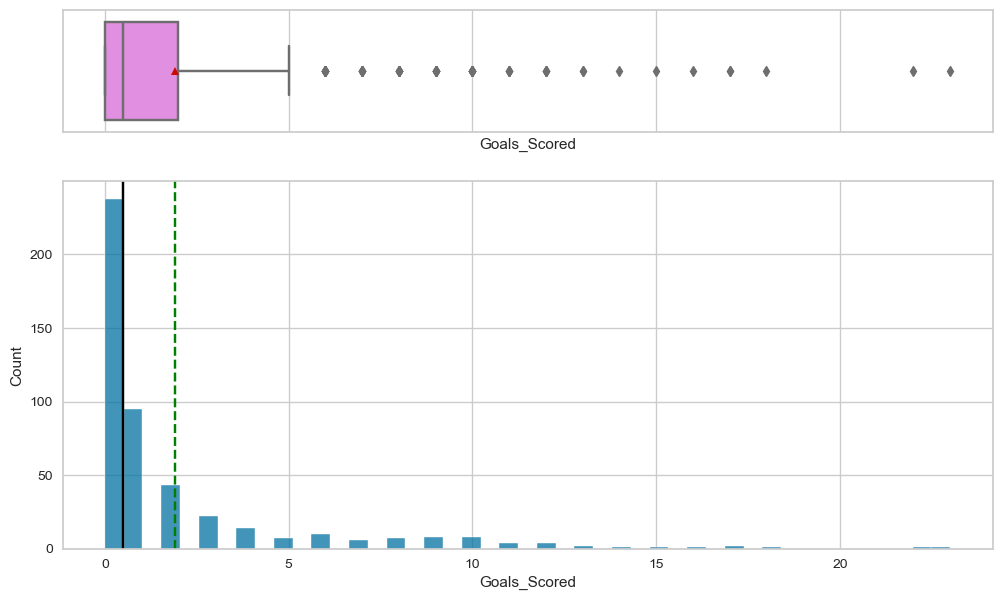

In [68]:
histogram_boxplot(df, 'Goals_Scored')

**`Assists`**

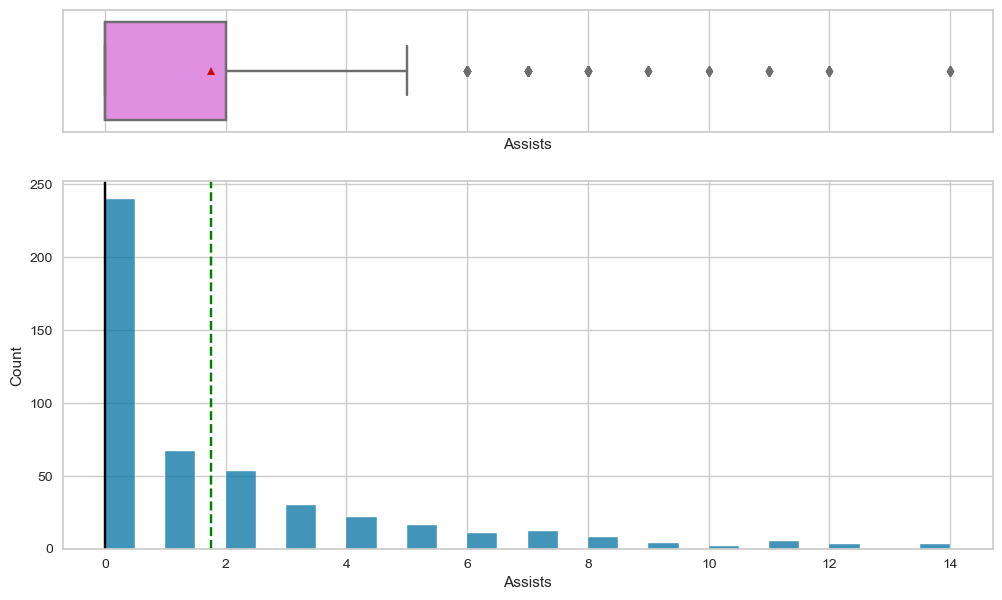

In [73]:
histogram_boxplot(df, 'Assists')  ## Complete the code to create histogram_boxplot for 'Assists'

**`Goals_Conceded`**

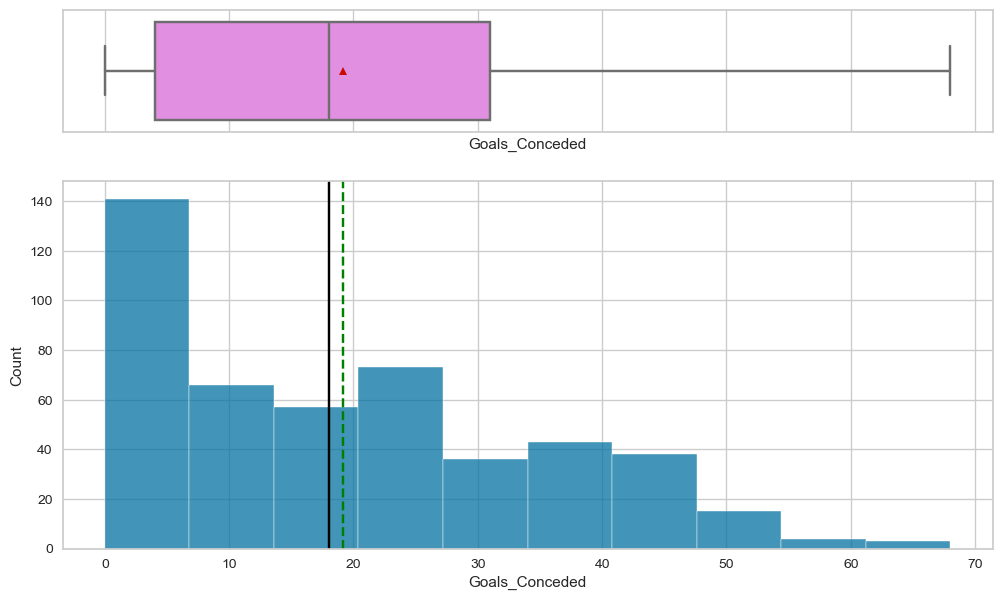

In [75]:
histogram_boxplot(df, 'Goals_Conceded')  ## Complete the code to create histogram_boxplot for 'Goals_Conceded'

**`Clean_Sheets`**

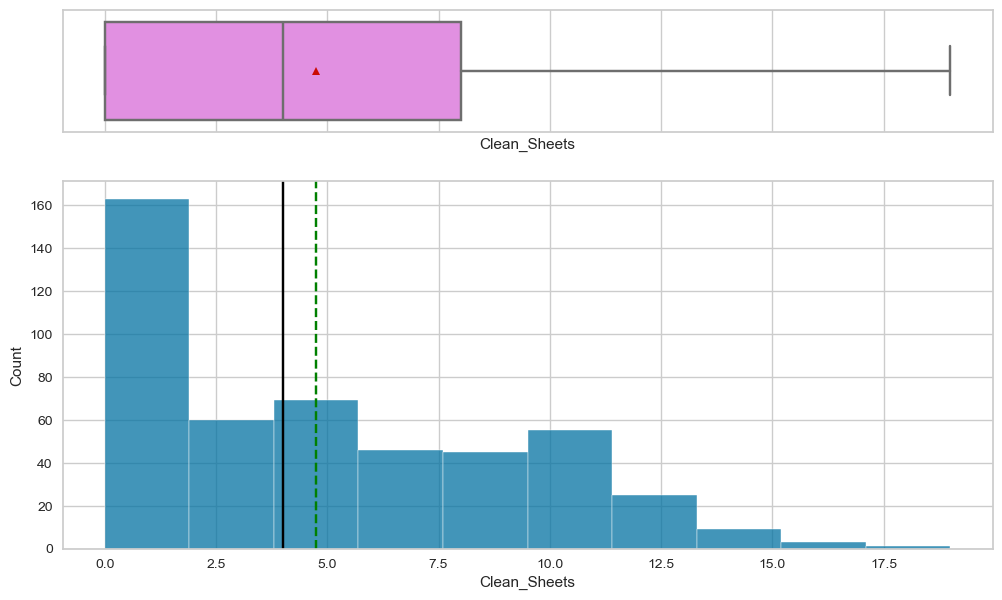

In [77]:
histogram_boxplot(df, 'Clean_Sheets')  ## Complete the code to create histogram_boxplot for 'Clean_Sheets'

**`Minutes`**

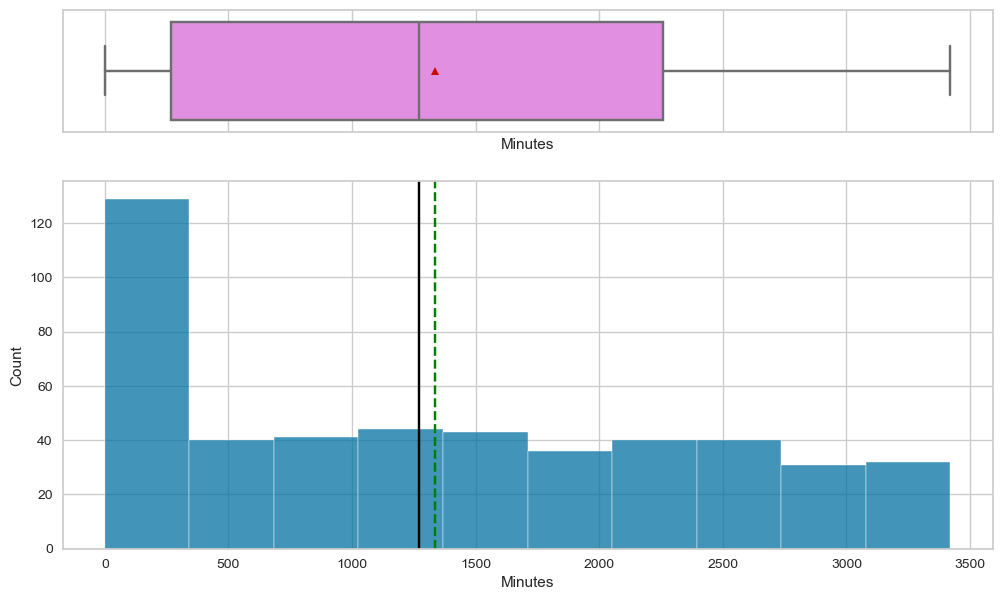

In [79]:
histogram_boxplot(df, 'Minutes')  ## Complete the code to create histogram_boxplot for 'Minutes'

**`Total_Points`**

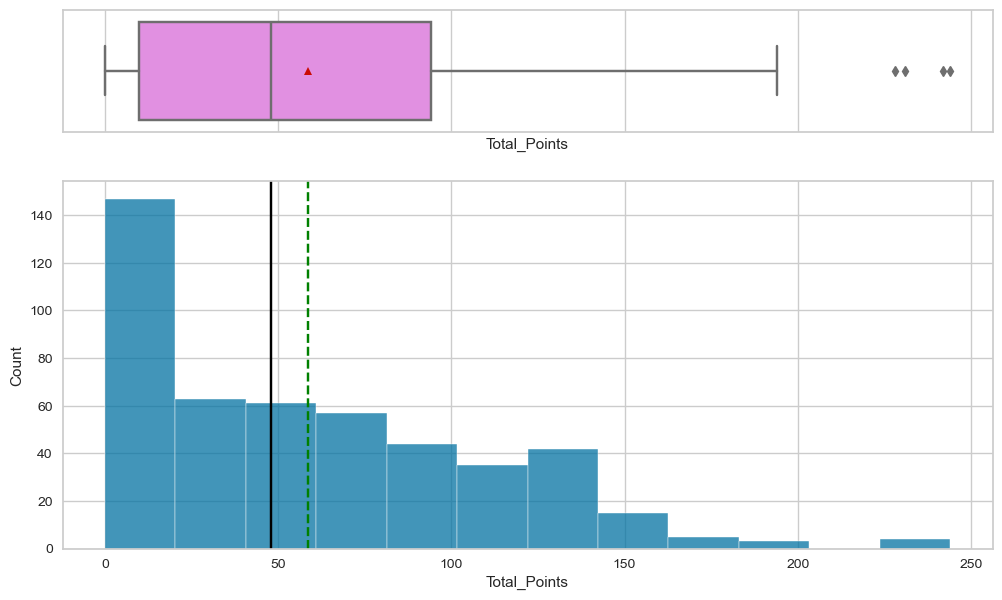

In [81]:
histogram_boxplot(df, 'Total_Points')  ## Complete the code to create histogram_boxplot for 'Total_Points'

**`Creativity`**

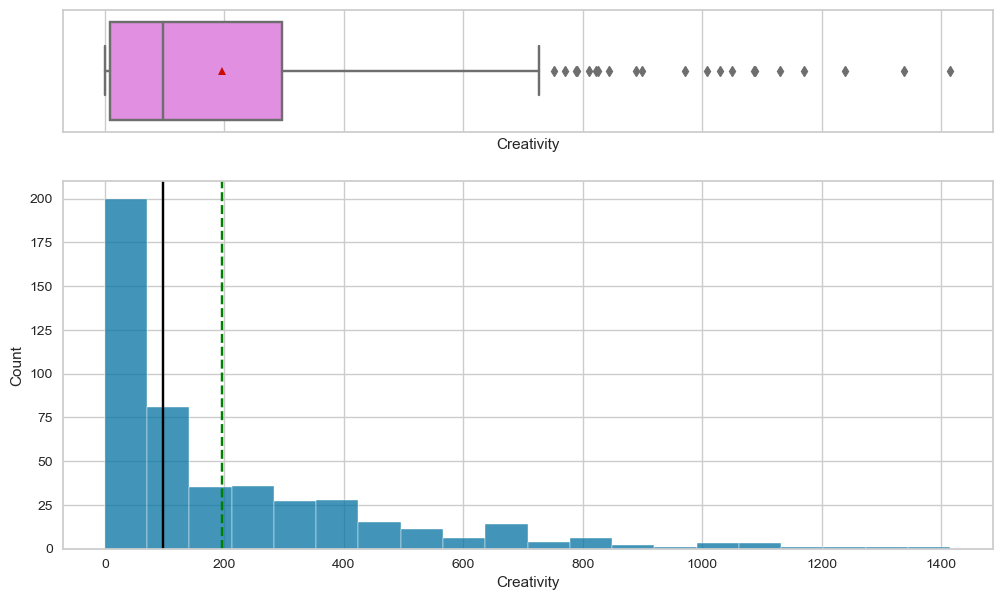

In [83]:
histogram_boxplot(df, 'Creativity')  ## Complete the code to create histogram_boxplot for 'Creativity'

**`Influence`**

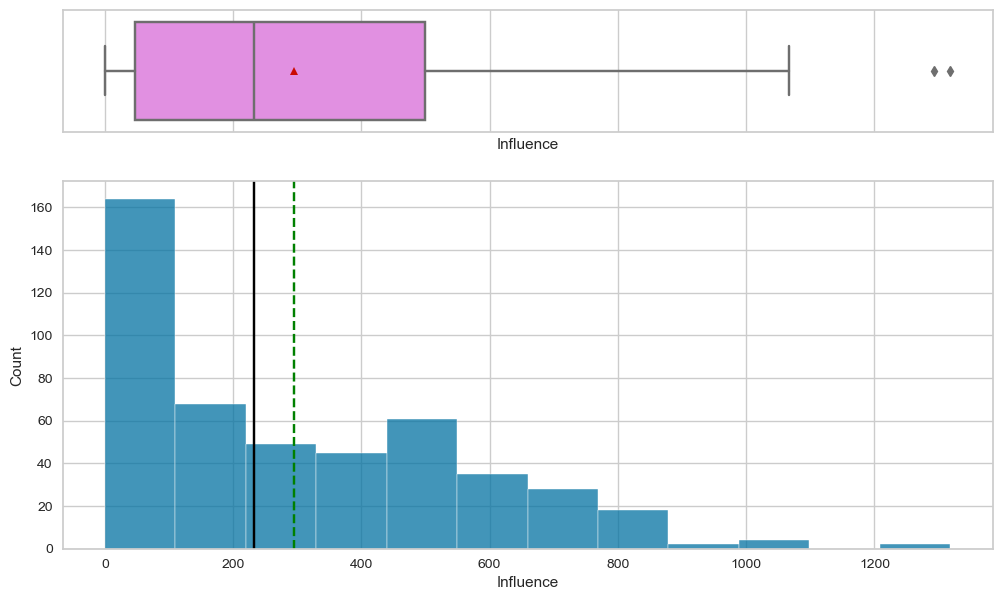

In [85]:
histogram_boxplot(df, 'Influence')  ## Complete the code to create histogram_boxplot for 'Influence'

**`Threat`**

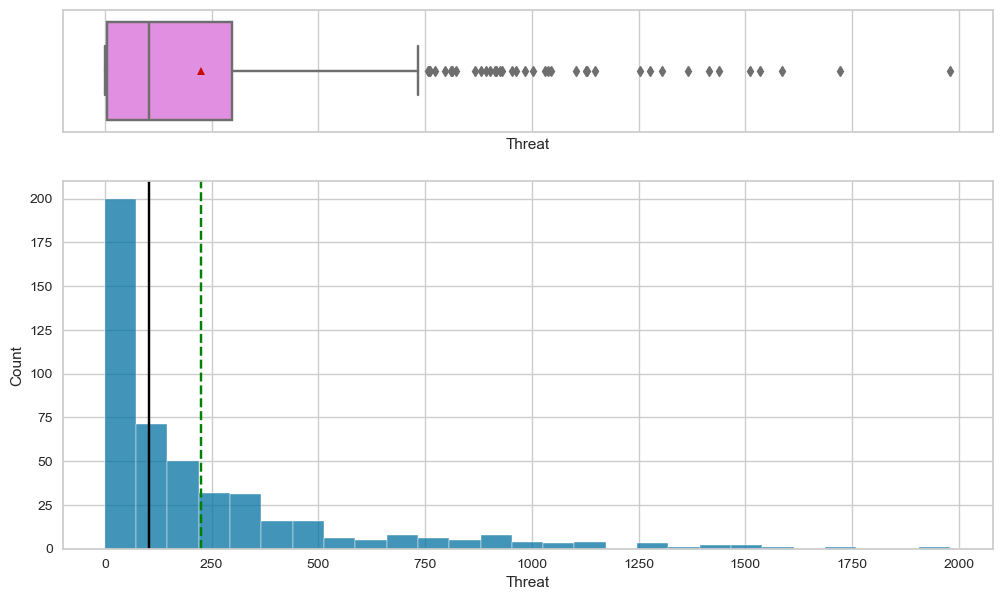

In [87]:
histogram_boxplot(df, 'Threat')  ## Complete the code to create histogram_boxplot for 'Threat'

**`Bonus`**

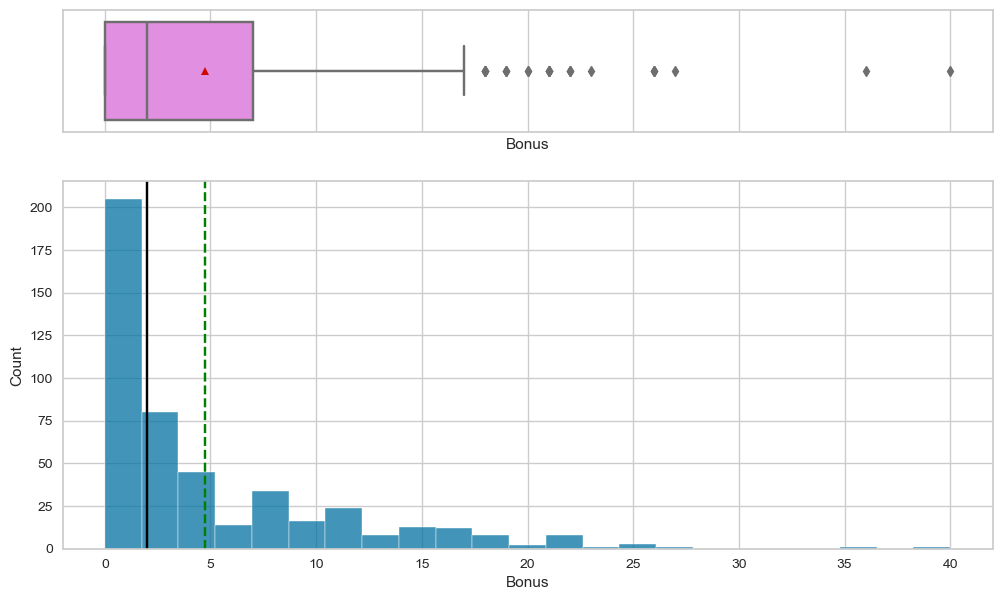

In [89]:
histogram_boxplot(df, 'Bonus')  ## Complete the code to create histogram_boxplot for 'Bonus'

**Observations and Insights:**
The **right skewed nature** consistent through all plots indicate this is **not likely due to outliers** but rather an natural imbalance in the players. This imbalance likely stems from one of two factors:
* Players who are higher performers.
* Certain positions that tend to rank higher on the measurable features.

In [91]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`Club`**

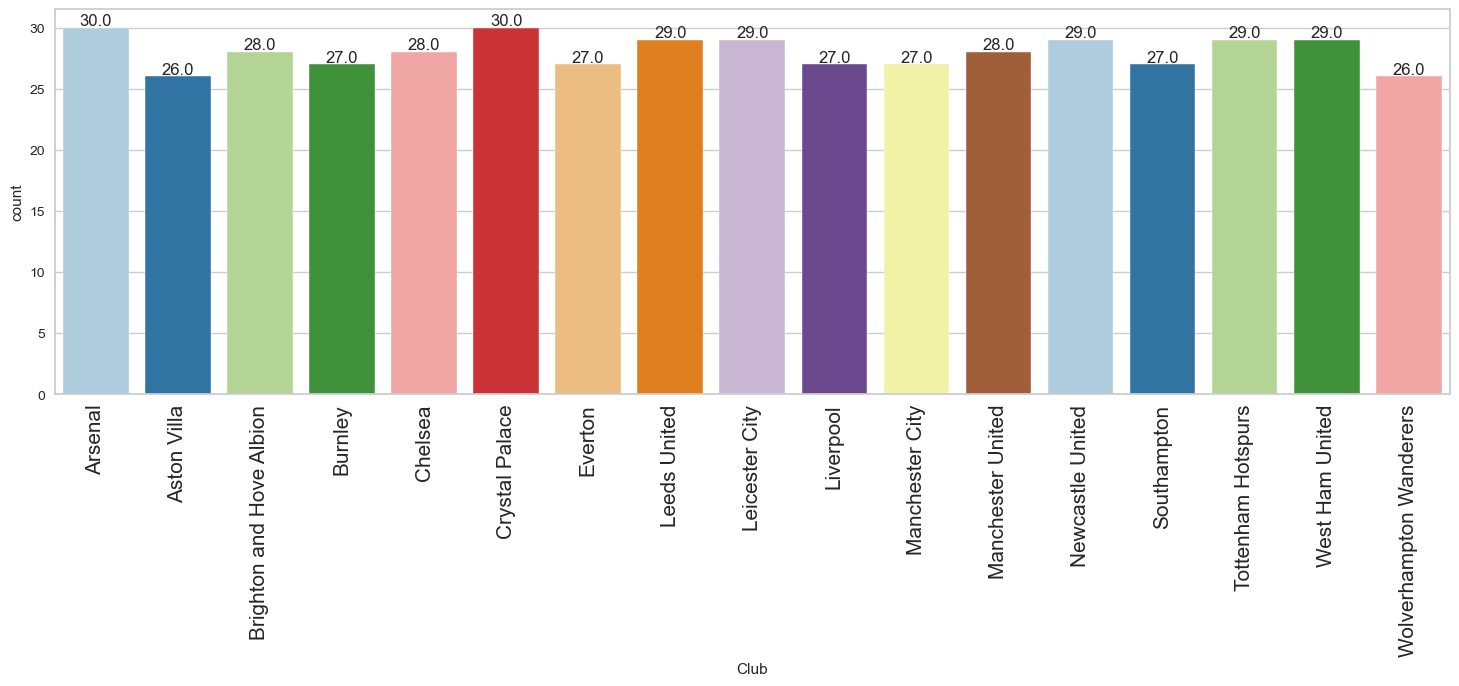

In [94]:
labeled_barplot(df, 'Club')

Reletively **uniform distribution** of players from each club, should help to minimize potential errors from imbalanced data. 

**`Position`**

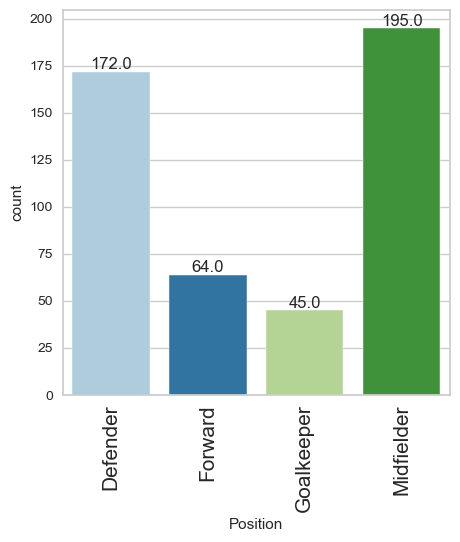

In [97]:
labeled_barplot(df, 'Position')  ## Complete the code to create a labelled barplot for 'Position'

Of the 11 players on the field depending on the formation there is 1 goalie, 3-5 defenders, 4-5 midfielders, 1-3 forwards. 
* The split shown above matches those ratios with positions ranked as: 
    * Number of Midfielders > Defenders > Forwards > Goalkeepers. 
* Given the number of Clubs and Goal Keepers, each club has on average 2-3 goal keepers.

### Bivariate Analysis

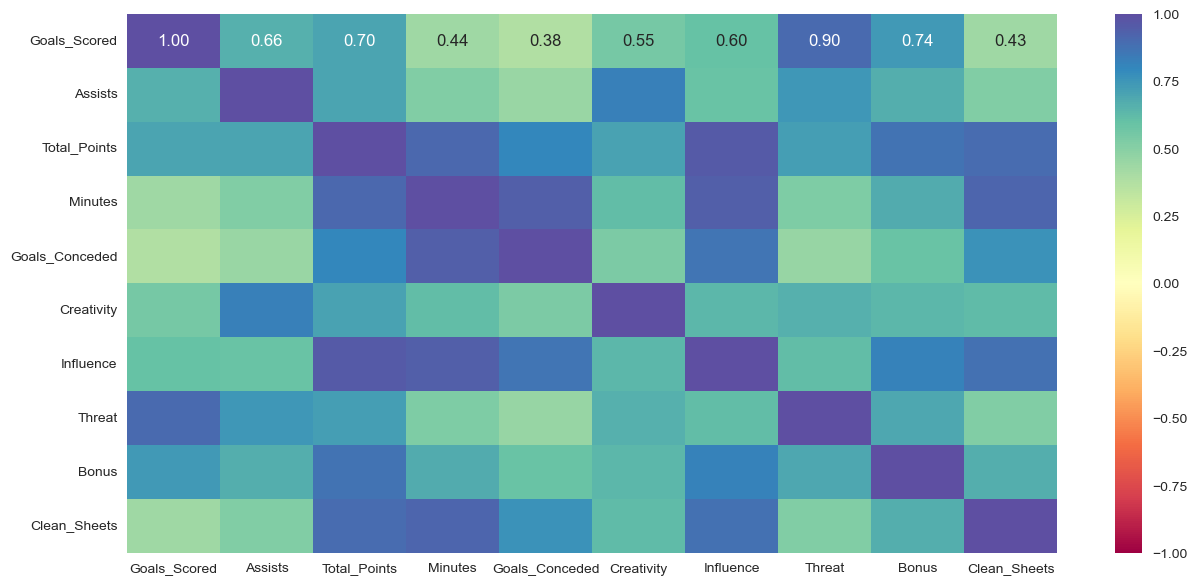

In [100]:
# correlation check
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations and Insights:**
There is a high correlation (>= 0.7 or <= -0.7) between:
* Correlation between Assists, Goals_Scored, and Total_Points, which makes sense given the first 2 contribute to the 3rd and those likely to score are also likely to get assists.
* Big correlation (.91) between minutes played and total_points, which makes sense as this gives players more chances.  
* Correlation between Goals_Conceded, Total_ Points, Minites, which echos our above observation that those withough goals conceded are likely not getting game time. 
* Correlation between Creativity and Assits, given creativity is a measure of, " A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.", that is likely mostly measured by assits. 

Could continue, but the **most relevant observation is that many of these features are highly correlated**.

**Let's check players from which team have scored the most fantasy points on average.**

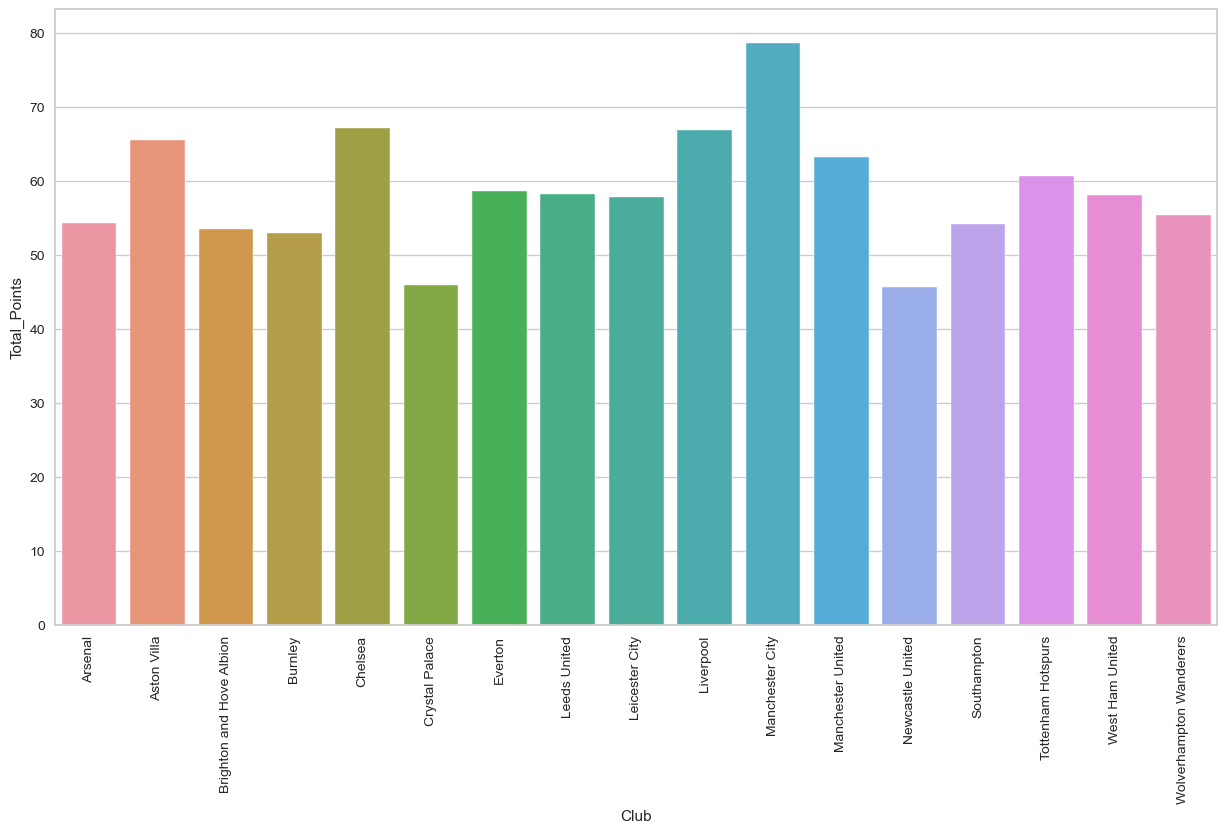

In [110]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Club', y='Total_Points', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

Manchester City is the leader in points while Crystal Palace, and Newcastle United have the lowest number of points. 

**We know that players in different positions have specific roles to play in a team. Let's check players in which positions tend to score more fantasy points on average.**

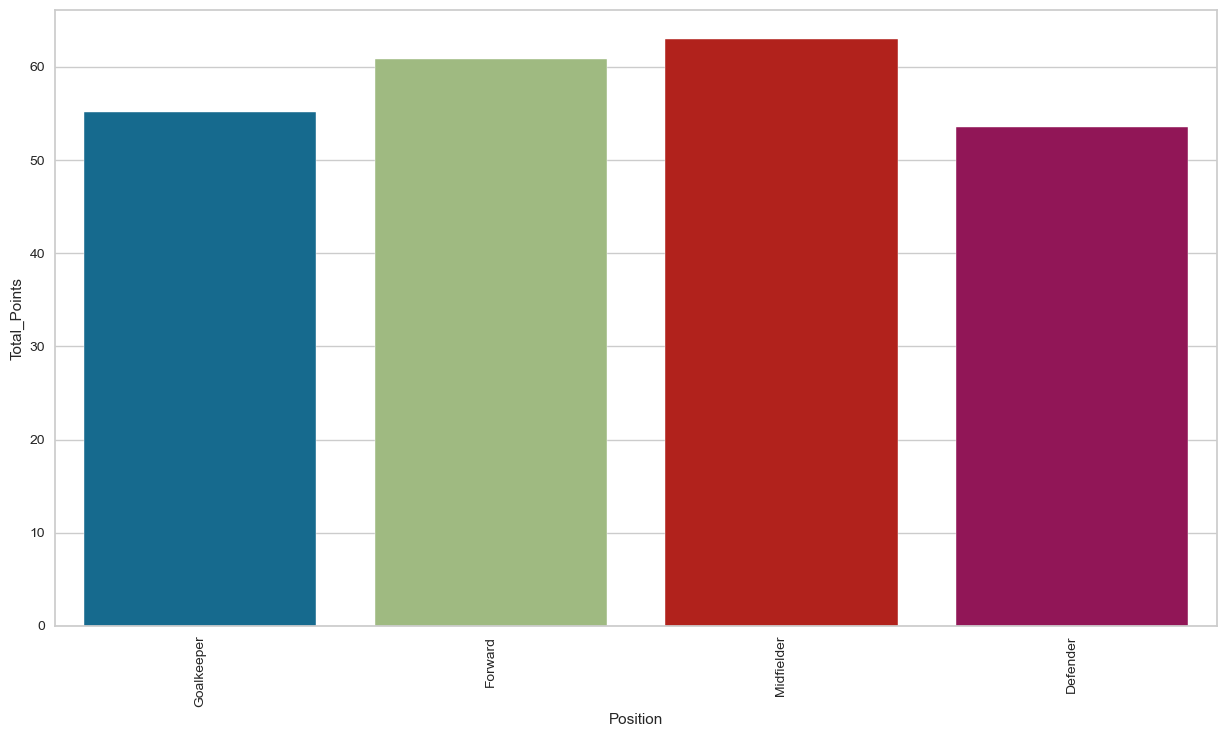

In [112]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Position', y='Total_Points', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

As expected Midfielders score the most total points followed by Forward more than Defenders and Goalkeepers. 

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. Let's check the total number of minutes played, on average, across different positions.**

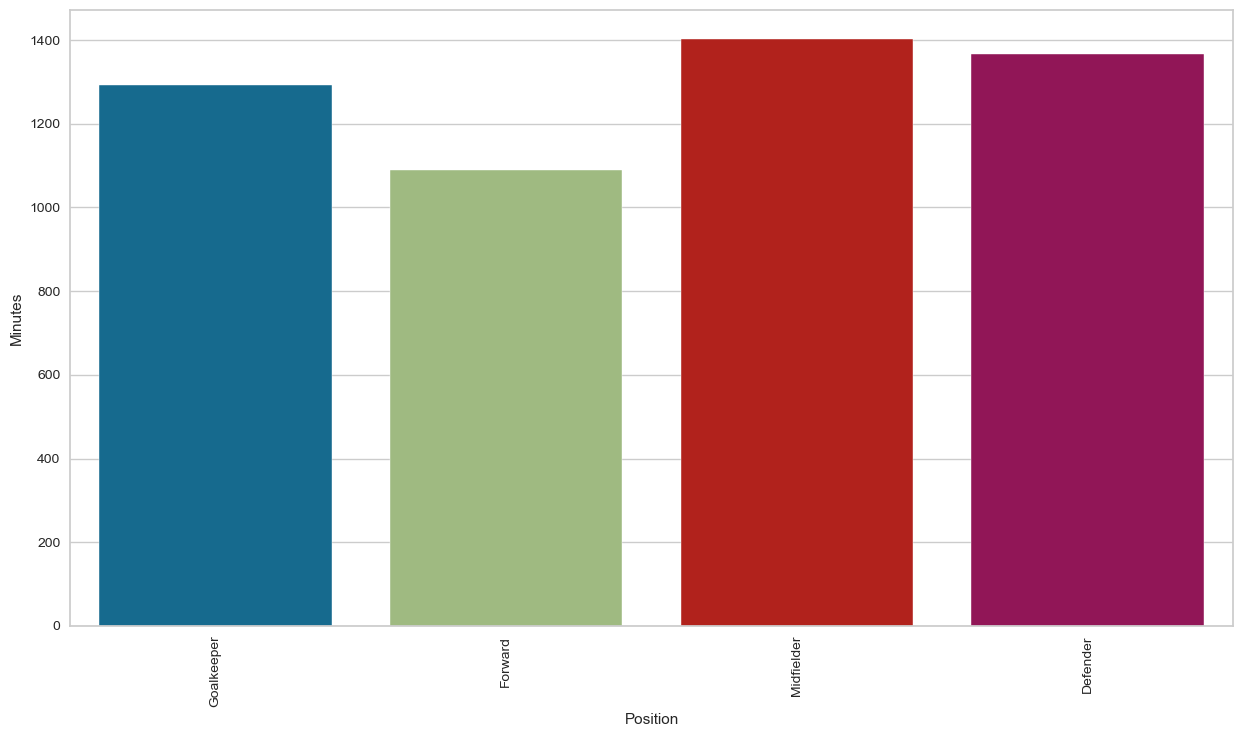

In [114]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Position', y='Minutes', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

Midfielders played most the minutes than anyother position players.

**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Let's check which team's players have secured the most bonus points, on average, last season.**

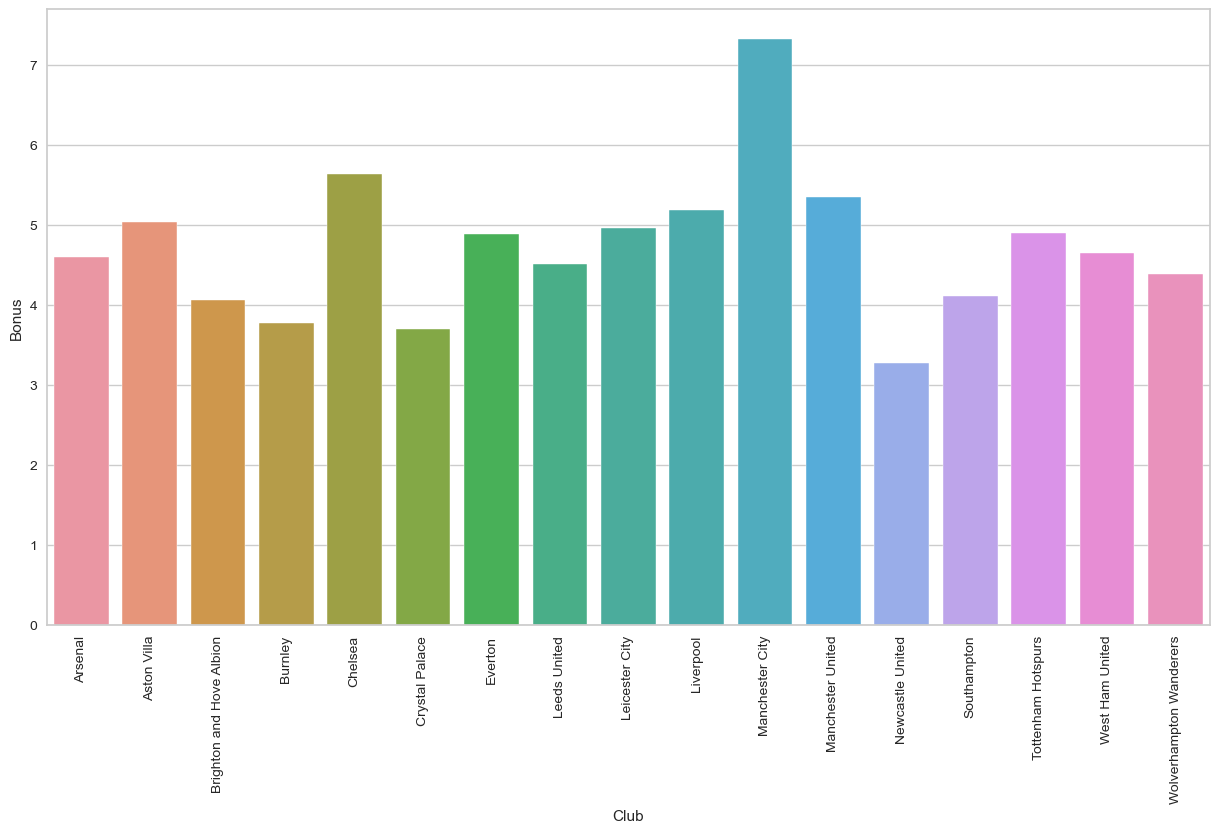

In [117]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Club', y='Bonus', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

Manchester City players have scored most bonus points than anyother club players.

**Let's see which players scored the most fantasy points last season for different positions of play.**

In [120]:
pos_list = df.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best_df = pd.concat([best_df, df_aux[df_aux.Total_Points == df_aux.Total_Points.max()][['Player_Name', 'Club', 'Position', 'Total_Points']]])

best_df

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
403,Harry Kane,Tottenham Hotspurs,Forward,242
315,Bruno Fernandes,Manchester United,Midfielder,244
223,Stuart Dallas,Leeds United,Defender,171


## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

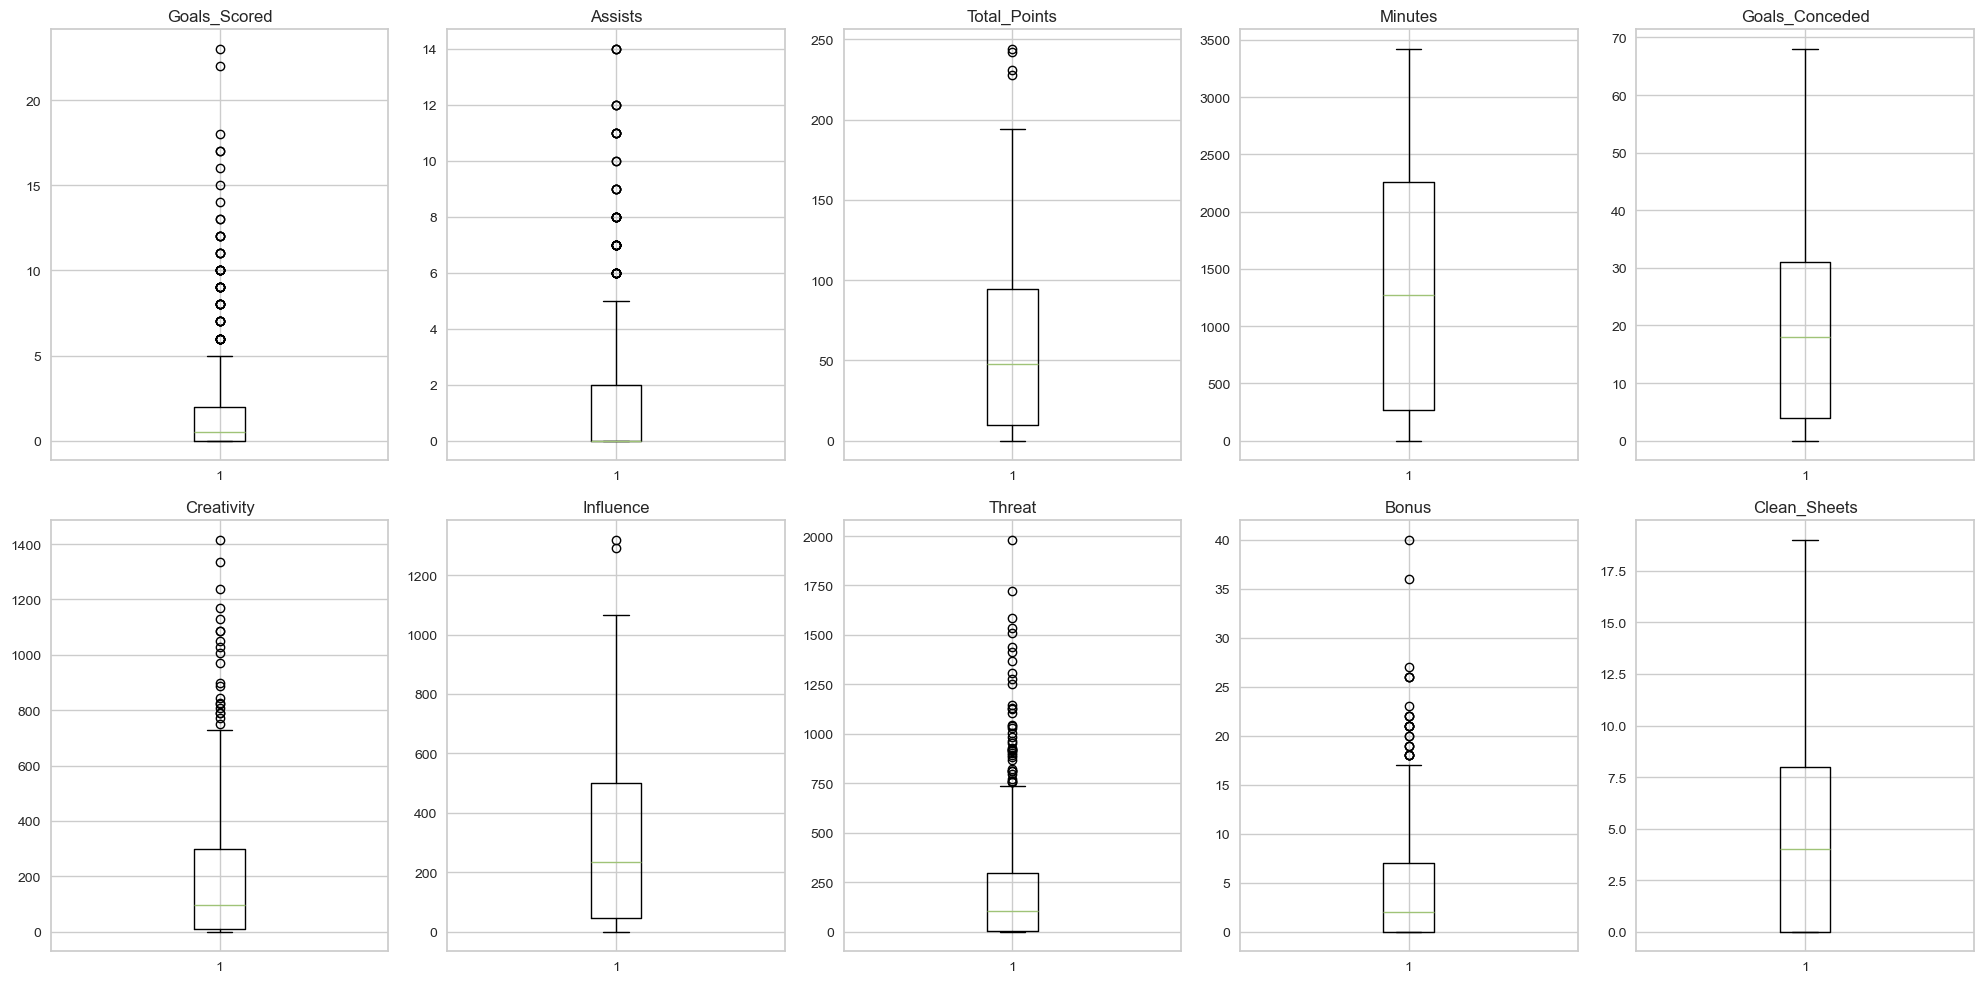

In [124]:
plt.figure(figsize=(20, 10))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

In [127]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[['Total_Points', 'Minutes', 'Bonus', 'Goals_Scored', 'Assists', 'Clean_Sheets', 'Influence', 'Creativity', 'Threat', 'Goals_Conceded']]  ## Complete the code to get the scaled data
subset_scaled = scaler.fit_transform(subset)

In [129]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [133]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.773037110097803
Number of Clusters: 2 	Average Distortion: 1.863573678589827
Number of Clusters: 3 	Average Distortion: 1.5612774038101604
Number of Clusters: 4 	Average Distortion: 1.3542782238901416
Number of Clusters: 5 	Average Distortion: 1.2931541699741689
Number of Clusters: 6 	Average Distortion: 1.225849543585495
Number of Clusters: 7 	Average Distortion: 1.16048401421345
Number of Clusters: 8 	Average Distortion: 1.109804758457438
Number of Clusters: 9 	Average Distortion: 1.0797310475776052
Number of Clusters: 10 	Average Distortion: 1.017436992641063
Number of Clusters: 11 	Average Distortion: 1.020874702026782
Number of Clusters: 12 	Average Distortion: 0.9850734409030882
Number of Clusters: 13 	Average Distortion: 0.9602766985773118
Number of Clusters: 14 	Average Distortion: 0.9413187781558086


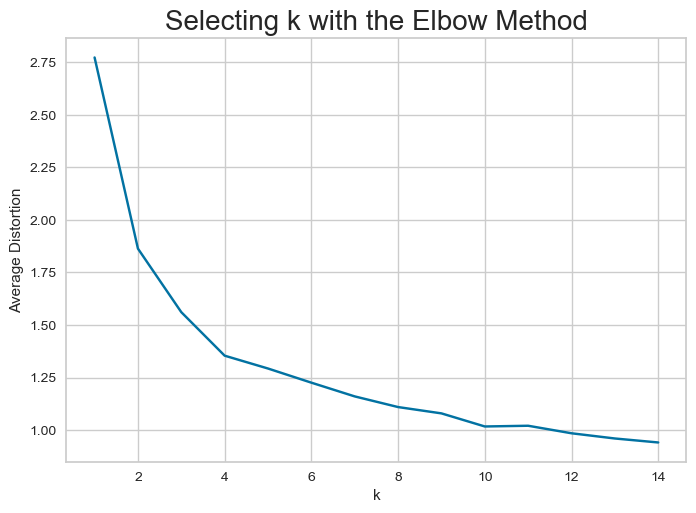

In [135]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Observations and Insights:**

- We will move ahead with k = 4 as this is when the graph starts to move nearly parallel to the X-axis. 

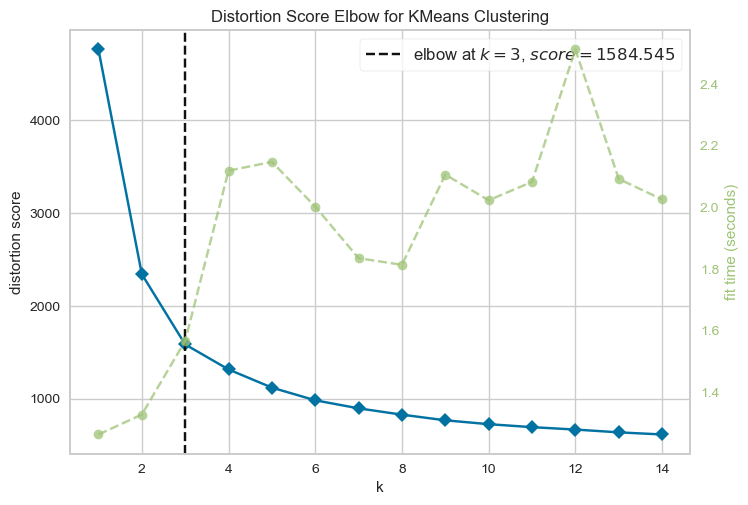

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [137]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Observations:**
- From the above observations, the appropriate value for k (number of clusters) seems to be 3.

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.4846029912769078)
For n_clusters = 3, the silhouette score is 0.4657385712264916)
For n_clusters = 4, the silhouette score is 0.40413213643851853)
For n_clusters = 5, the silhouette score is 0.4106388194369884)
For n_clusters = 6, the silhouette score is 0.41463610535548756)
For n_clusters = 7, the silhouette score is 0.38269083243169755)
For n_clusters = 8, the silhouette score is 0.3750329965069647)
For n_clusters = 9, the silhouette score is 0.3763672451125454)
For n_clusters = 10, the silhouette score is 0.3366262890546732)
For n_clusters = 11, the silhouette score is 0.36316754405085544)
For n_clusters = 12, the silhouette score is 0.33109479660192553)
For n_clusters = 13, the silhouette score is 0.33713548340219107)
For n_clusters = 14, the silhouette score is 0.3331138792029168)


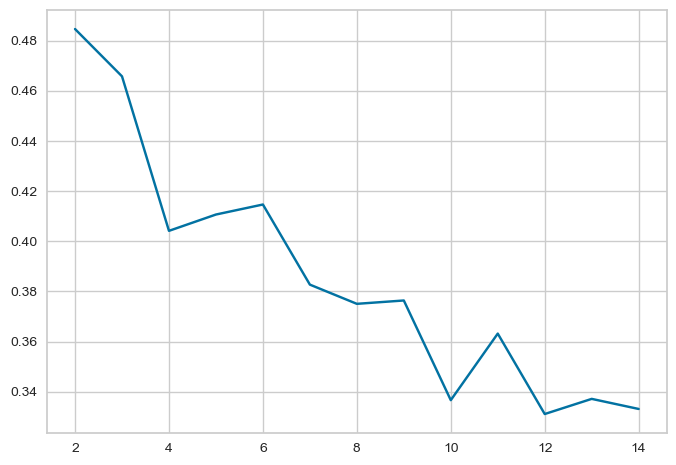

In [140]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

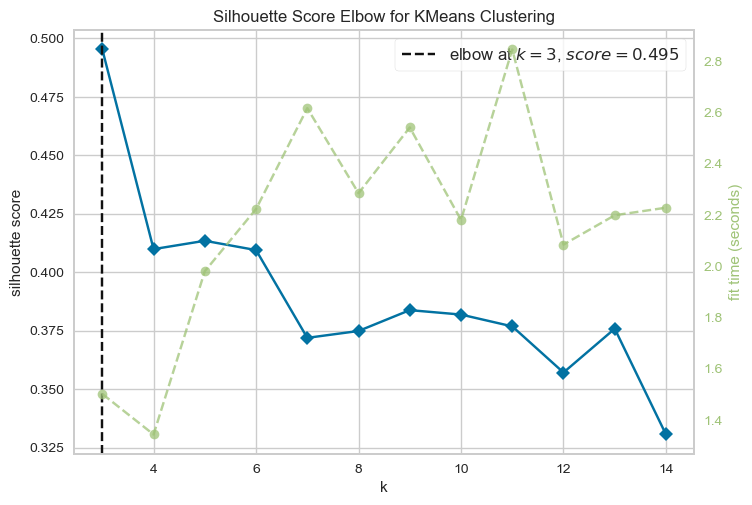

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [240]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(3, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Observations:**
- After analyzing the silhouette scores for different k values, it seems 3 is a good value for the
 number of clusters.

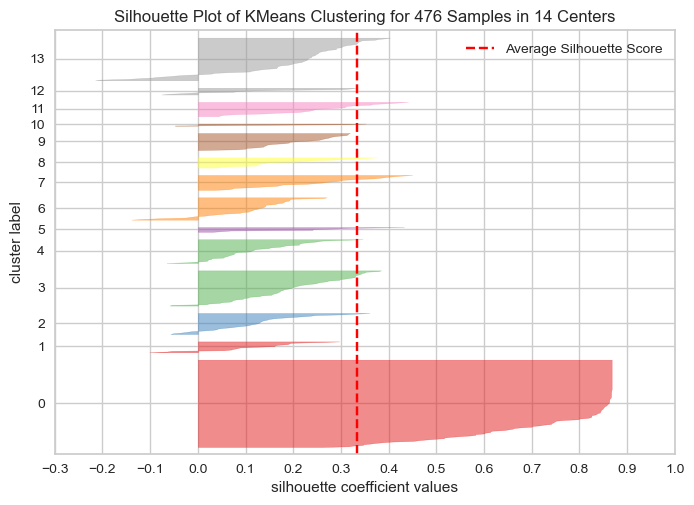

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 476 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [146]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

In [153]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [155]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [162]:
km_cluster_profile = df1.groupby("KM_segments").mean(numeric_only = True)  ## Complete the code to groupby the cluster labels

In [164]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Total_Points"].count().values  ## Complete the code to groupby the cluster labels
)

In [166]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,1.620482,1.849398,87.102410,2216.674699,31.710843,246.007831,471.510843,237.042169,6.048193,8.066265,166
1,0.337398,0.390244,17.646341,449.780488,6.971545,50.710976,80.154472,55.865854,0.841463,1.304878,246
2,8.687500,6.734375,141.468750,2464.921875,33.437500,624.568750,660.143750,843.593750,16.171875,9.359375,64


In [168]:
## Complete the code to print the players in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Calum Chambers' 'Cedric Soares' 'David Luiz'
 'Edward Nketiah' 'Gabriel Teodoro Martinelli Silva' 'Martin Odegaard'
 'Matt Macey' 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'William Saliba' 'Ahmed El Mohamady'
 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Aaron Connolly' 'Alexis Mac Allister'
 'Alireza Jahanbakhsh' 'Andi Zeqiri' 'Bernardo Fernandes da Silva Junior'
 'Davy Propper' 'Jakub Moder' 'Jason Steele' 'Jayson Molumby'
 'Jose Izquierdo' 'Mathew Ryan' 'Percy Tau' 'Reda Khadra' 'Steven Alzate'
 'Tariq Lamptey' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Erik Pieters' 'Jack Cork' 'Jeff Hendrick' 'Jimmy Dunne'
 'Joel M

In [170]:
df1.groupby(["KM_segments", "Position"])['Player_Name'].count()

KM_segments  Position  
0            Defender      70
             Forward        9
             Goalkeeper    17
             Midfielder    70
1            Defender      93
             Forward       35
             Goalkeeper    28
             Midfielder    90
2            Defender       9
             Forward       20
             Midfielder    35
Name: Player_Name, dtype: int64

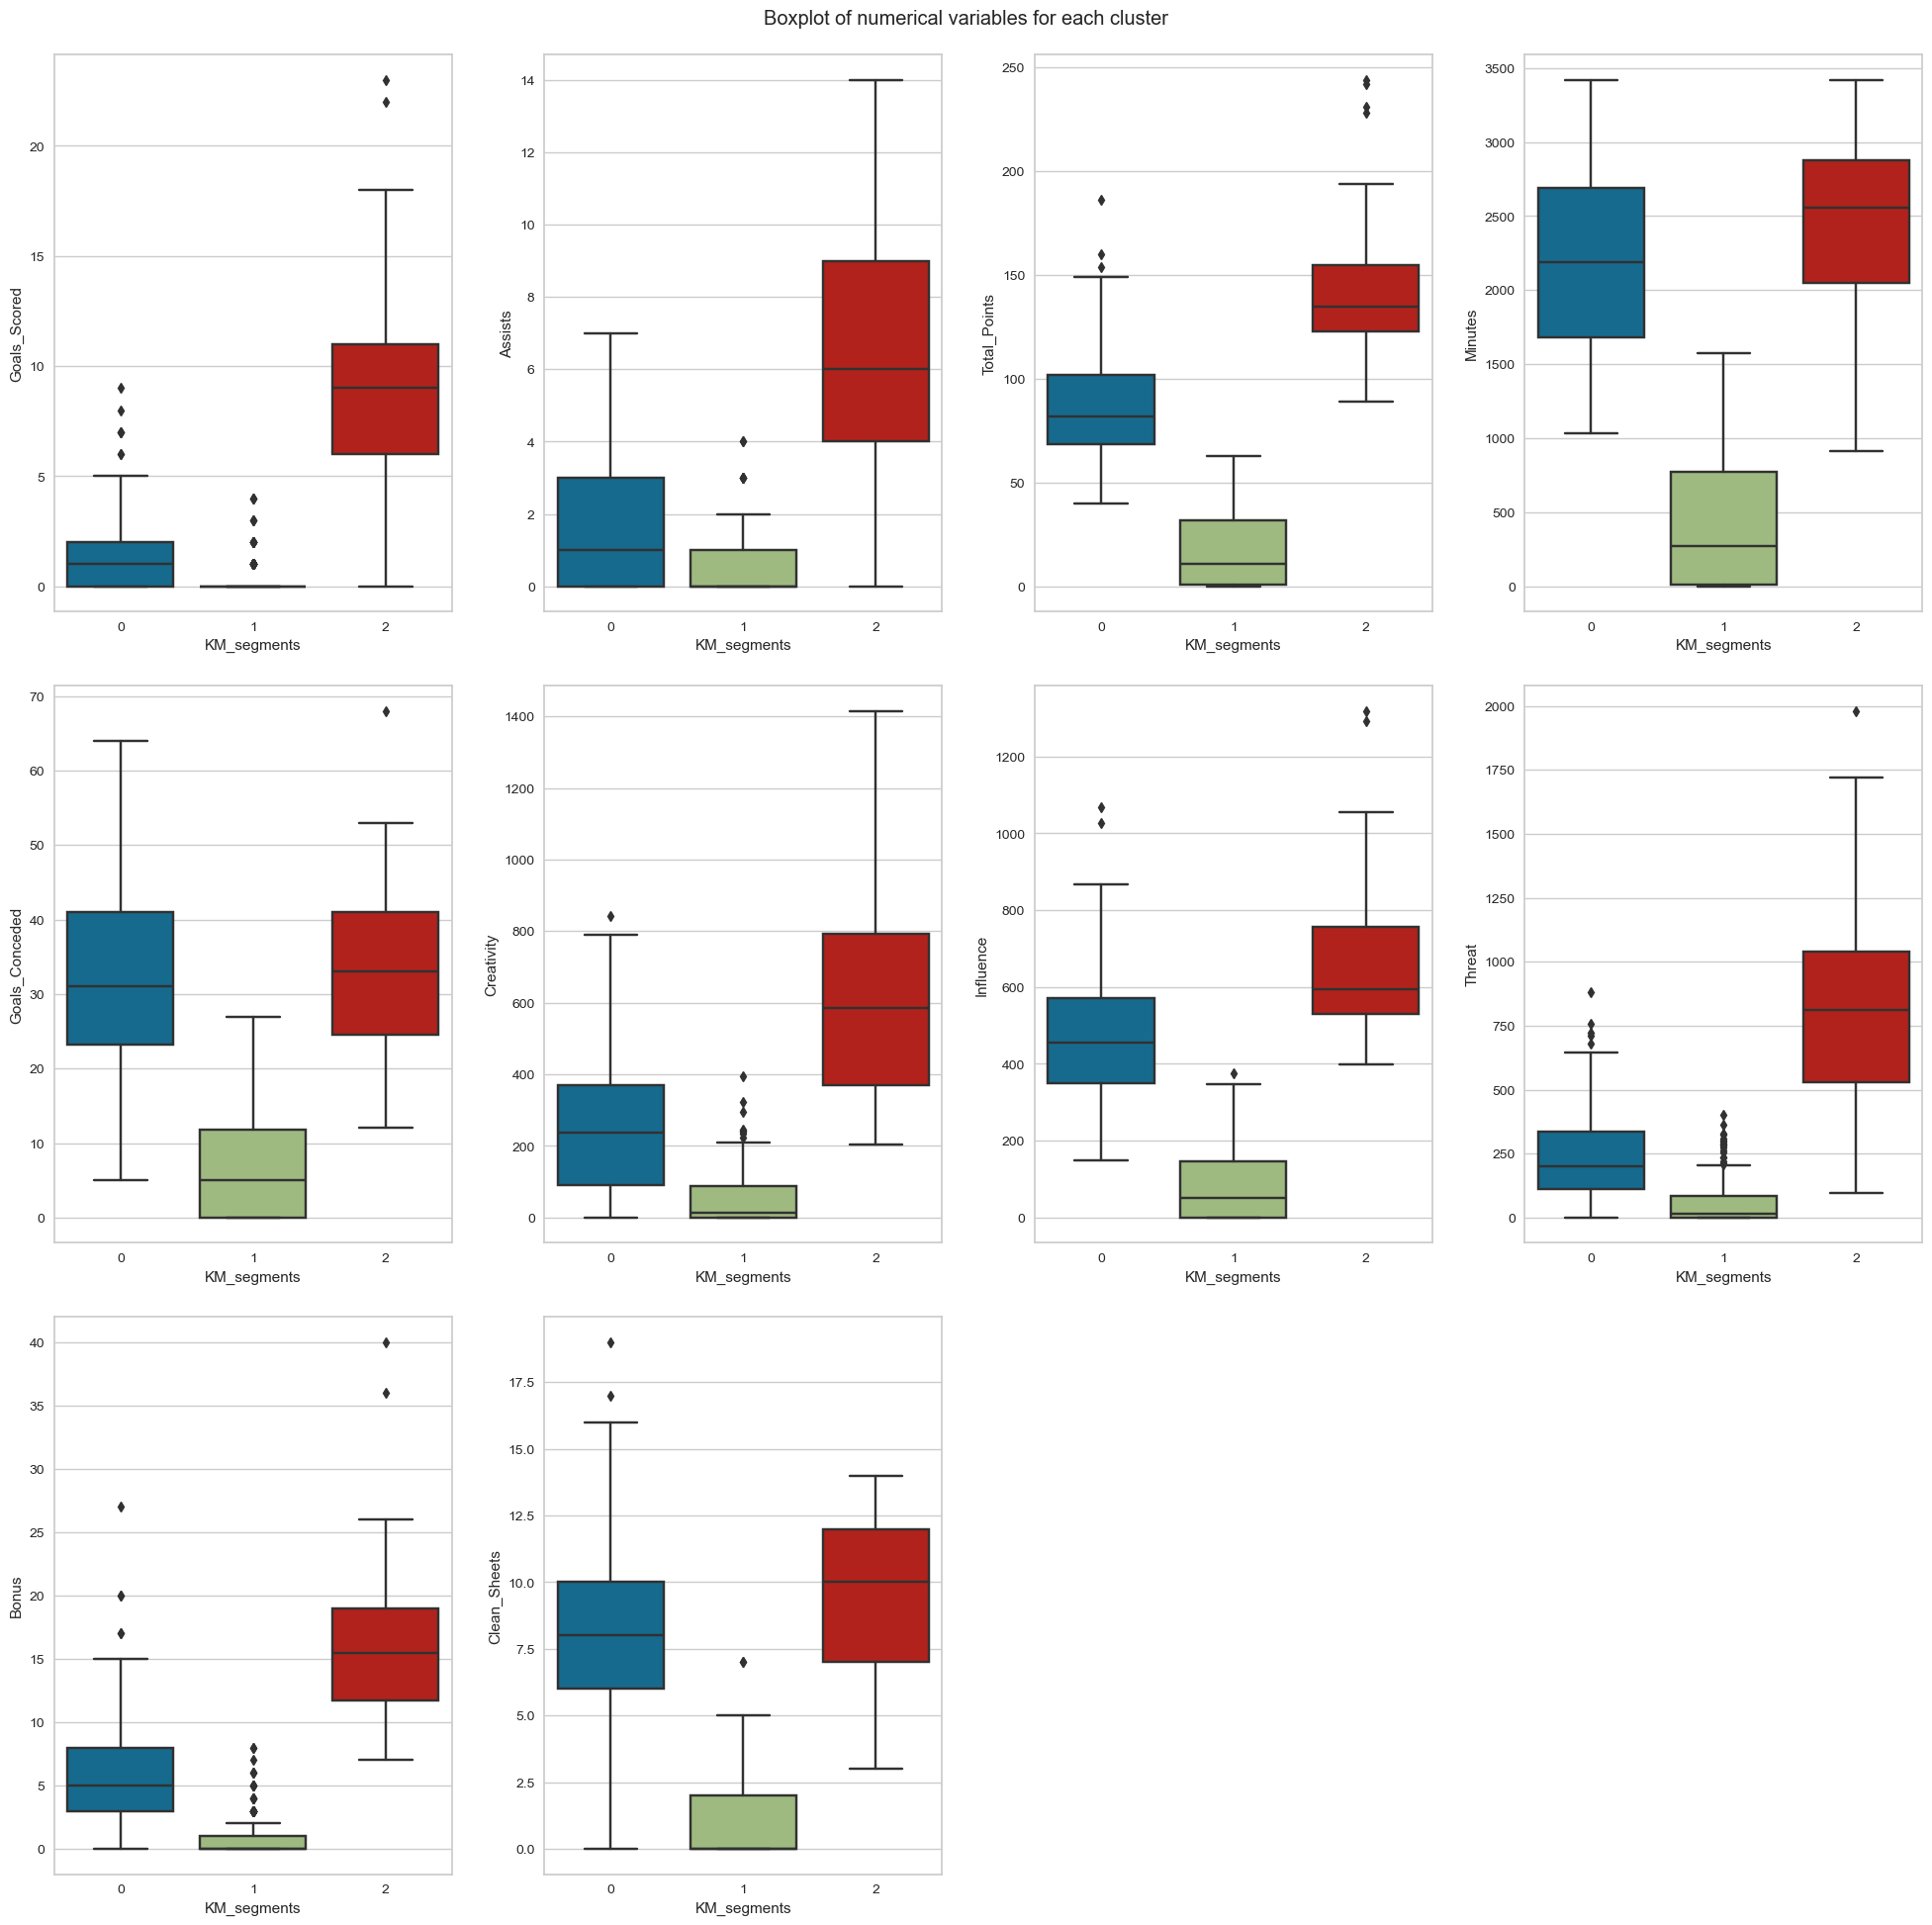

In [172]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

**Characteristics of each cluster:**

**Cluster 0**
* There are 166 players in this cluster.
* Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are midium.
* Most of the players in this cluster had a moderate game time, midium creativity score, midium influence score, and a moderate threat score.
* Most of the players in this cluster received midium bonus points.

**Cluster 1**
* There are 246 players in this cluster.
* Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are lowest.
* Most of the players in this cluster had lowest game time, lowest creativity score, lowest influence score, and lowest threat score.
* Most of the players in this cluster received lowest bonus points.

**Cluster 2**
* There are 64 players in this cluster.
* Most of the players in this cluster have a lots of goals and assists, and the total fantasy points scored in the previous season are high.
* Most of the players in this cluster had a high game time, a high creativity aand influence scores.
* Most of the players in this cluster received high bonus points.


**From this we can say that:**
* **Cluster 2** are the **high value players** who have performed exeptionally well last season.
* **Cluster 0** are the **moderate value players** who have performed well last season.
* **Cluster 1** are the **low value players** who have performed poorly last season despite getting game time last season.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [176]:
hc_df = subset_scaled_df.copy()

In [178]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228705.
Cophenetic correlation for Euclidean distance and complete linkage is 0.741204129226176.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585418.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.862458135106748.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8397660913391951.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8083029497725449.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8590072179300738.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8367206550474544.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132244.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946488974.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434049.
Cophenetic corr

**Let's explore different linkage methods with Euclidean distance only.**

In [181]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.8430175514228705.
Cophenetic correlation for complete linkage is 0.741204129226176.
Cophenetic correlation for average linkage is 0.8476499945585418.
Cophenetic correlation for centroid linkage is 0.8068296032280463.
Cophenetic correlation for ward linkage is 0.5777738445861551.
Cophenetic correlation for weighted linkage is 0.862458135106748.
****************************************************************************************************
Highest cophenetic correlation is 0.862458135106748, which is obtained with weighted linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance only.**

### Checking Dendrograms

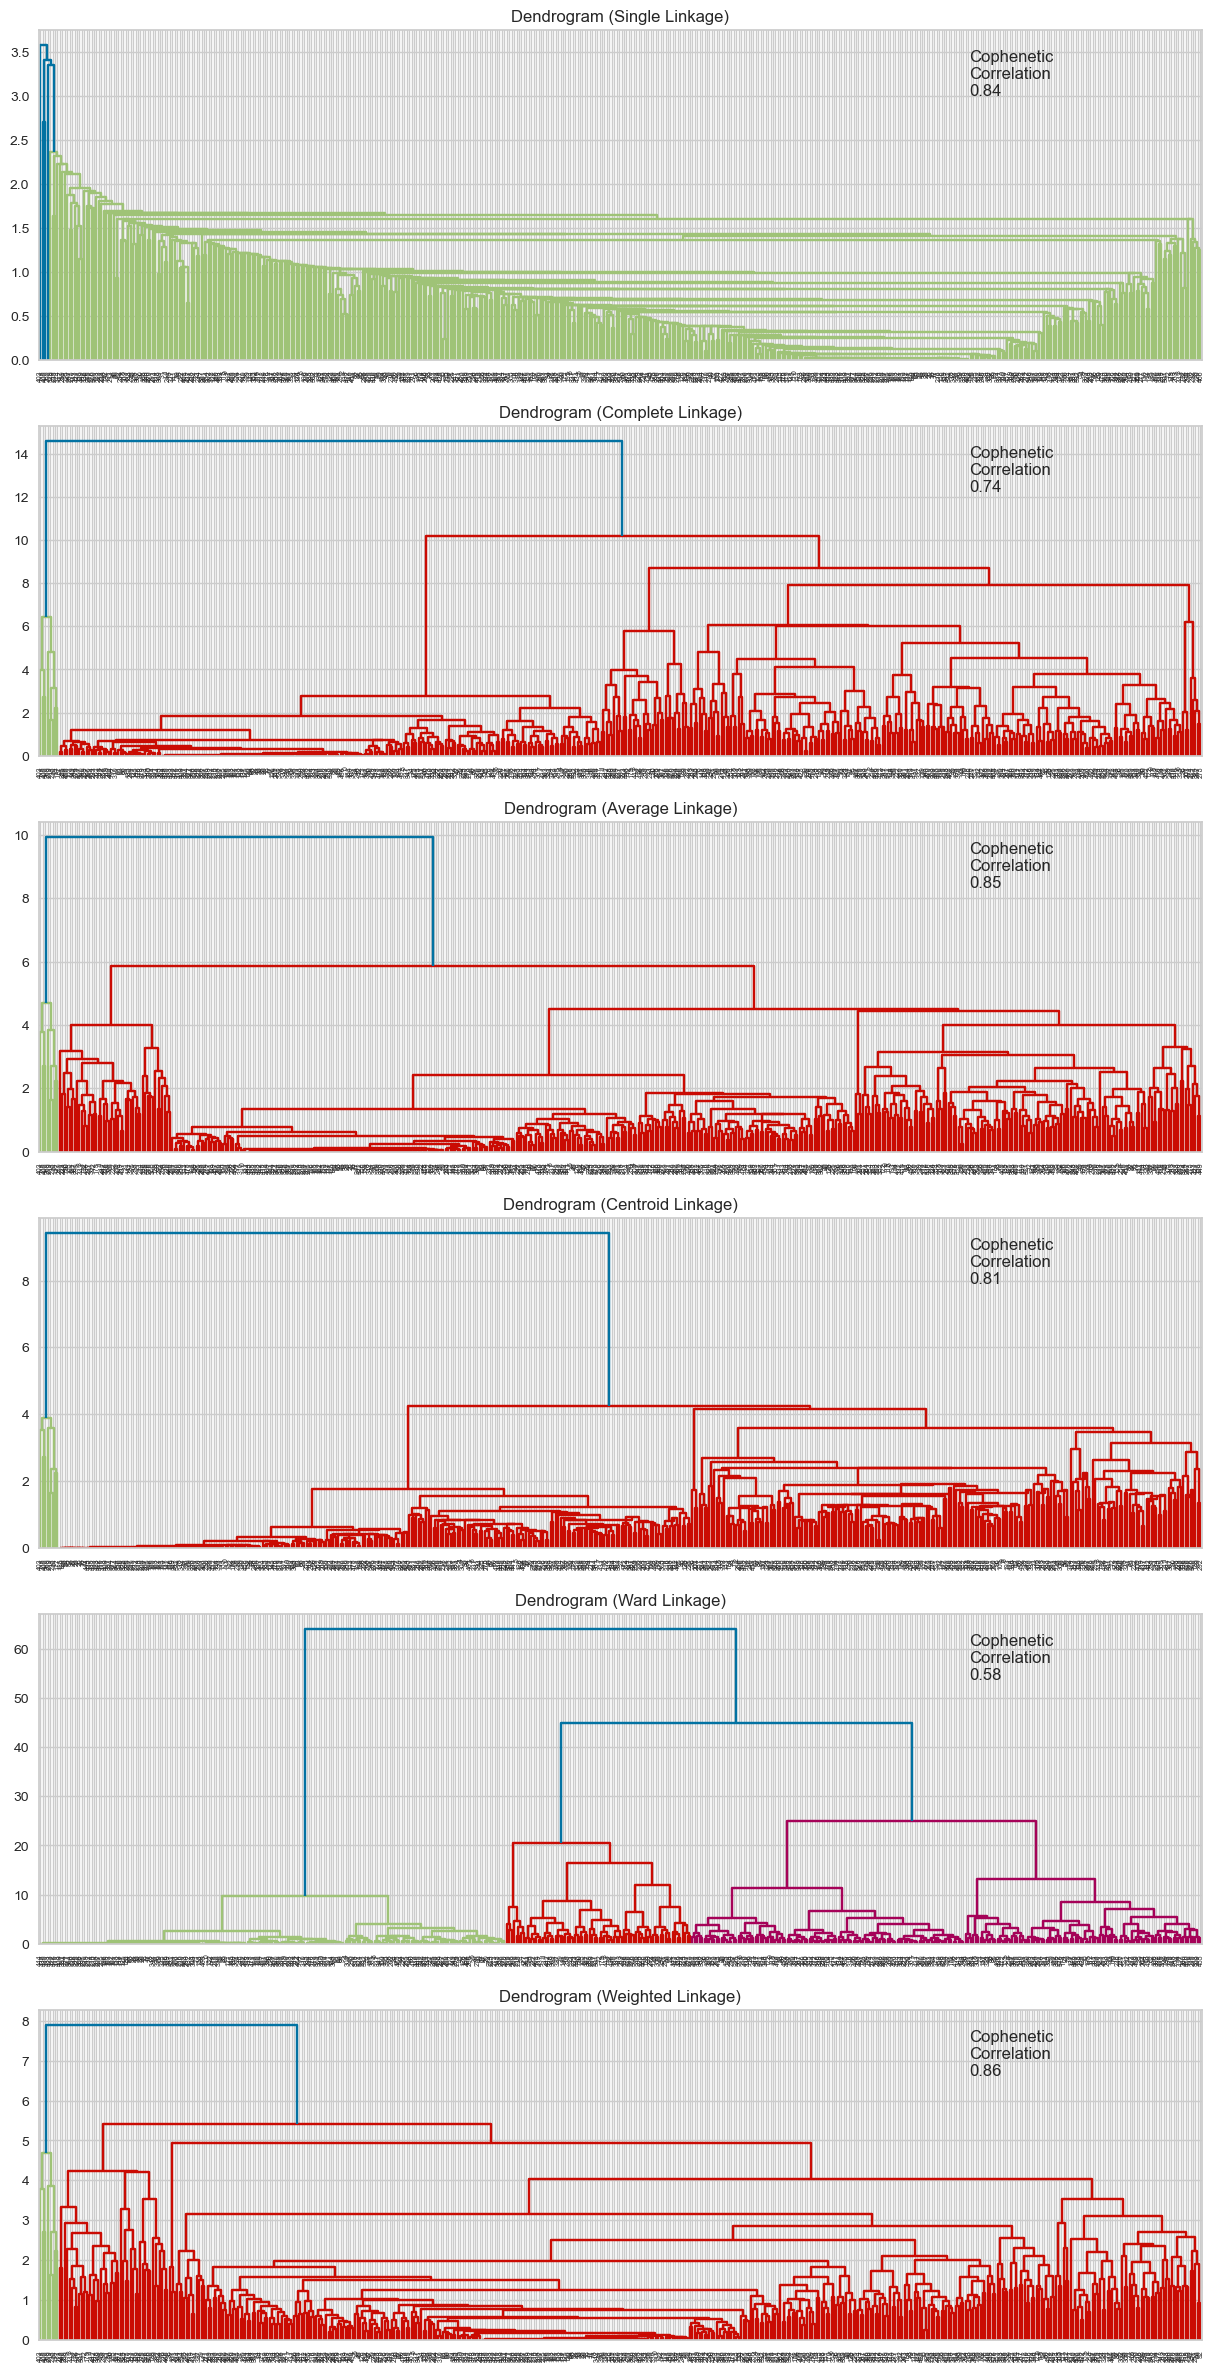

In [185]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [187]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


Use 3 clusters, euclidean distance, and average linkage (sklearn does not support weighted linkage so average is the next best option)

In [274]:
# Apply Hierarchical Clustering with optimal linkage
optimal_hc_clusters = 3  # Adjust based on dendrogram & cophenetic correlation
HCmodel = AgglomerativeClustering(n_clusters=optimal_hc_clusters, affinity='euclidean', linkage='ward')
df["Cluster_Hierarchical"] = HCmodel.fit_predict(subset_scaled_df)

# Cluster Profiling
hc_cluster_profile = df.groupby("Cluster_Hierarchical").mean(numeric_only=True)
print(hc_cluster_profile)


                      Goals_Scored   Assists  Total_Points      Minutes  \
Cluster_Hierarchical                                                      
0                         1.306220  1.454545     74.531100  1920.086124   
1                         0.157068  0.251309     10.324607   248.863874   
2                         7.960526  6.342105    135.592105  2467.605263   

                      Goals_Conceded  Creativity   Influence      Threat  \
Cluster_Hierarchical                                                       
0                          27.598086  201.858373  397.696651  203.382775   
1                           4.094241   31.026702   45.018848   30.785340   
2                          33.802632  594.343421  638.431579  772.302632   

                          Bonus  Clean_Sheets  
Cluster_Hierarchical                           
0                      4.966507      6.889952  
1                      0.460733      0.586387  
2                     14.736842      9.302632  


### Creating model using sklearn

In [190]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  ## Complete the code to define the hierarhical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [192]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [197]:
hc_cluster_profile = df2.groupby("HC_segments").mean(numeric_only = True)  ## Complete the code to groupby the cluster labels

In [199]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Total_Points"].count().values  ## Complete the code to groupby the cluster labels
)

In [201]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments,,,,,,,,,,,
0,1.306220,1.454545,74.531100,1920.086124,27.598086,201.858373,397.696651,203.382775,4.966507,6.889952,209
1,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191
2,7.960526,6.342105,135.592105,2467.605263,33.802632,594.343421,638.431579,772.302632,14.736842,9.302632,76


In [205]:
## Complete the code to print the players in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following teams are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Club"].unique())
    print()

In cluster 1, the following teams are present:
['Arsenal' 'Aston Villa' 'Brighton and Hove Albion' 'Burnley' 'Chelsea'
 'Crystal Palace' 'Everton' 'Leeds United' 'Leicester City' 'Liverpool'
 'Manchester City' 'Manchester United' 'Newcastle United' 'Southampton'
 'Tottenham Hotspurs' 'West Ham United' 'Wolverhampton Wanderers']

In cluster 2, the following teams are present:
['Arsenal' 'Aston Villa' 'Brighton and Hove Albion' 'Burnley' 'Chelsea'
 'Crystal Palace' 'Everton' 'Leeds United' 'Leicester City' 'Liverpool'
 'Manchester City' 'Manchester United' 'Newcastle United' 'Southampton'
 'Tottenham Hotspurs' 'West Ham United' 'Wolverhampton Wanderers']

In cluster 0, the following teams are present:
['Arsenal' 'Aston Villa' 'Brighton and Hove Albion' 'Burnley' 'Chelsea'
 'Crystal Palace' 'Everton' 'Leeds United' 'Leicester City' 'Liverpool'
 'Manchester City' 'Manchester United' 'Newcastle United' 'Southampton'
 'Tottenham Hotspurs' 'West Ham United' 'Wolverhampton Wanderers']



In [207]:
df2.groupby(["HC_segments", "Position"])['Player_Name'].count()

HC_segments  Position  
0            Defender      90
             Forward       14
             Goalkeeper    20
             Midfielder    85
1            Defender      72
             Forward       29
             Goalkeeper    25
             Midfielder    65
2            Defender      10
             Forward       21
             Midfielder    45
Name: Player_Name, dtype: int64

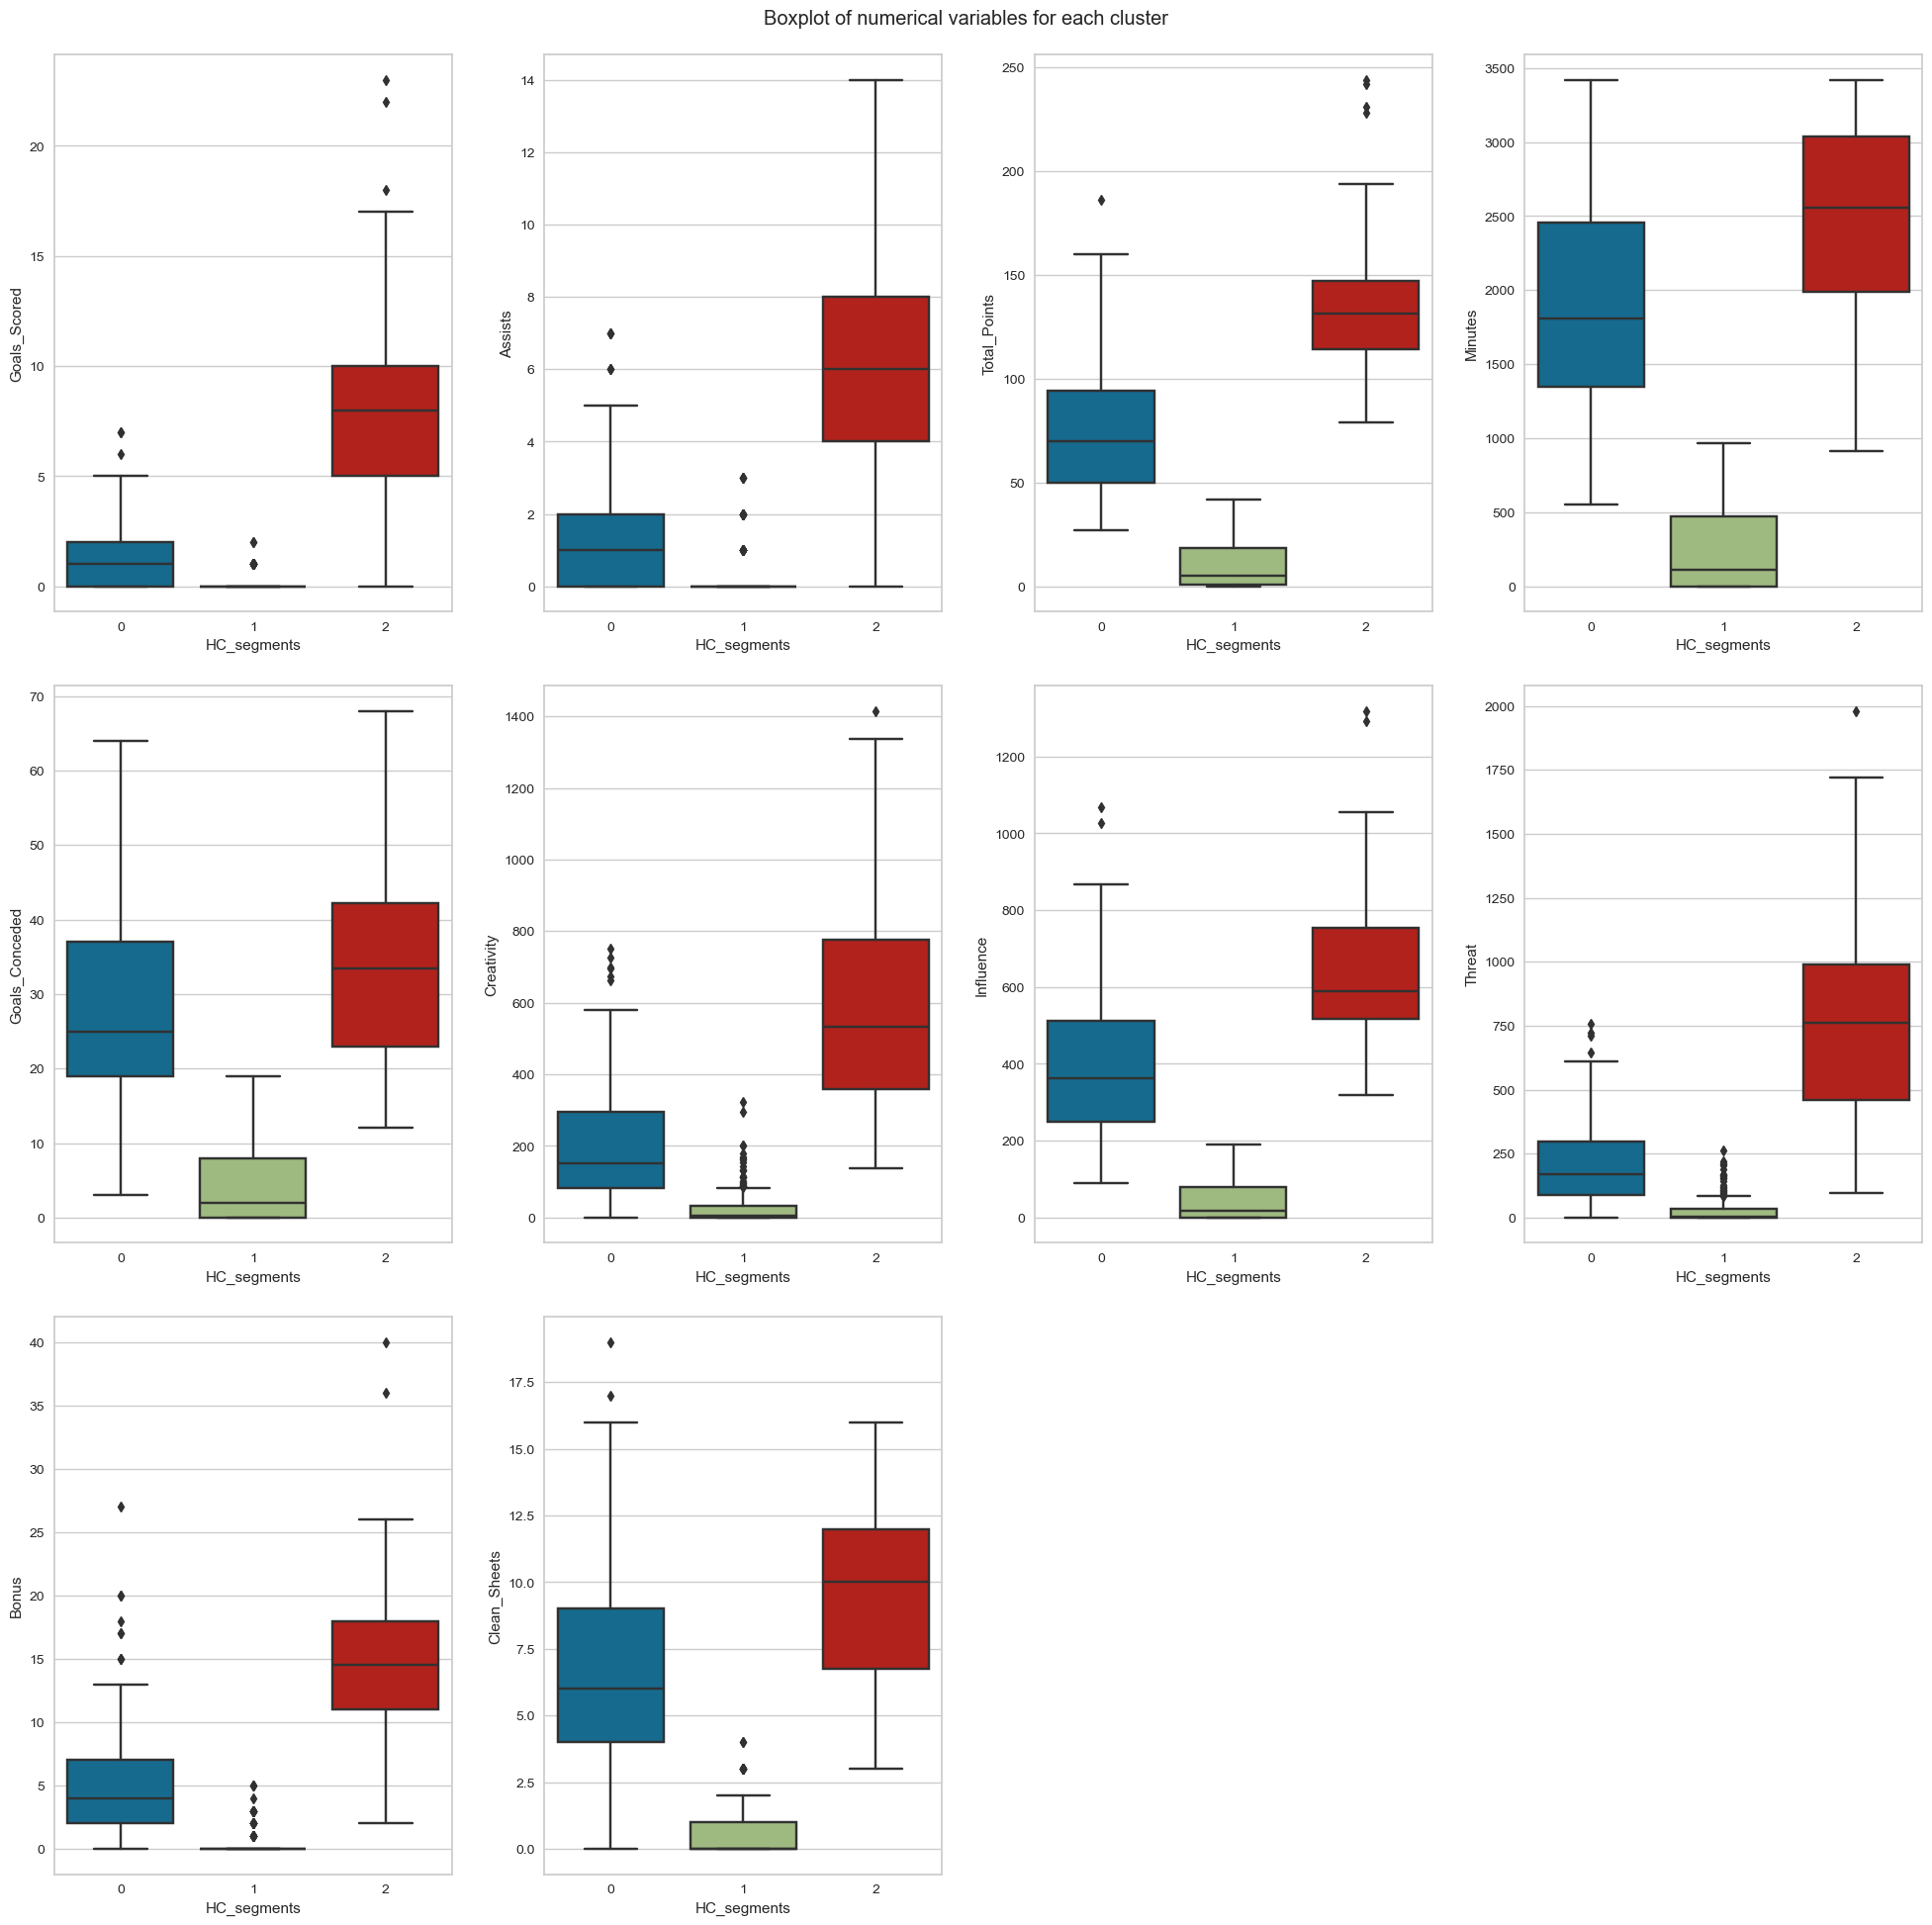

In [209]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## Actionable Insights and Recommendations

**Recommendations:**
* Cluster 2 players are the top players for fantasy. They fetch more points and have a higher chance of getting bonus points too. These players should be priced higher than the others so that it will be difficult to accommodate too many of them in the same team (because of the fixed budget) and fantasy managers have to make wise choices.
* Cluster 1 players are players who do not play many minutes, most likely come on as substitutes and fetch lesser fantasy points as a result. These players should be priced low and can be good differential picks.
* Cluster 0 are the players who are influential in their team's play but do not tend to score or assist much, resulting in lesser fantasy points than the Cluster 2 players. These players should be priced somewhere between the Cluster 2 and Cluster 1 players.
* Cluster 1 has the players who are in the squad to provide backup in case any of the starting 11 players get injured. They get lower game time and barely get any fantasy points. These players should be priced the lowest amongst the 3 clusters.
* Player performances from previous seasons should be taken into account and fantasy prices from the previous season should be referred to as a benchmark to determine the price for the upcoming season.
* OnSports should conduct cluster analysis separately for each of the playing positions to arrive at a better fantasy pricing strategy, given that football is heavily biased towards offensive players.

___